SDNormalizedApplewatchHR_LE - Najprawdopodobniej jest to odchylenie standardowe znormalizowanego rytmu serca.
Obrazuje, jak bardzo znormalizowane wartości tętna zmieniają się w czasie. Wyższe odchylenie wskazuje na większe wahania rytmu serca, natomiast niższe oznacza bardziej stabilne wartości.

CorrelationApplewatchHeartrateSteps_LE w zestawie danych odnosi się do korelacji między rytmem serca a liczbą kroków zarejestrowanych przez Fitbit w trybie oznaczonym jako "LE". Ocenia, jak silnie liczba kroków wpływa na rytm serca w ciągu dnia.

ApplewatchIntensity_LE- Odnosi się do intensywności wysiłku fizycznego obliczonej na podstawie wzoru Karvonena.
Wzór Karvonena (HRR – Heart Rate Reserve) jest używany do wyznaczania docelowej intensywności treningu:
Target Heart Rate = Resting HR+(Max HR−Resting HR)× Intensity
Wartość ta mierzy poziom wysiłku fizycznego względem tętna maksymalnego i spoczynkowego.



Entropy :

Heart: Wyższa entropia wskazuje na większe fluktuacje rytmu serca, natomiast niższa oznacza bardziej stałe lub przewidywalne wartości.
Oznacza poziom nieprzewidywalności lub nieregularności w liczbie kroków. Entropia- w tym przypadku oznacza to, jak zmienny był rytm serca użytkownika w ciągu dnia. 

Steps: Wysoka entropia sugeruje dużą zmienność kroków w ciągu dnia (np. nieregularne wzorce aktywności), a niska entropia oznacza bardziej przewidywalny, stały rytm aktywności.

RestingApplewatchHeartrate_LE - tetno spoczynkowe w stanie BEZ wysilku. 

NormalizedApplewatchHeartrate_LE to przekształcone, znormalizowane tętno, które uwzględnia różnice między użytkownikami, skalowane na podstawie zakresu (np. między tętnem spoczynkowym a maksymalnym).
Tętno spoczynkowe (Resting Heart Rate, RHR)
Dorośli (18+ lat):

60–100 uderzeń na minutę (bpm) jest uważane za normę.
Sportowcy: mogą mieć niższe tętno, np. 40–60 bpm, co wynika z dobrej kondycji serca.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('data_for_weka_aw.csv')

In [3]:
data.head()

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,Lying
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,Lying
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,Lying
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,Lying
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,Lying


In [4]:
data = data.rename(columns={'Unnamed: 0': 'TimestampoftheRecord'})

Mamy 3656 minut - recordow , to nazwalam to Timestamp of the record. 

In [5]:
data.head(10)

,TimestampoftheRecord,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,Lying
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,Lying
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,Lying
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,Lying
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,Lying
5,6,20,1,168.0,65.4,14.290909,78.803129,11.495667,0.011174,6.221612,6.116349,59.0,1.000000,19.803129,0.140448,0.264722,0.159691,Sitting
6,7,20,1,168.0,65.4,14.994805,78.890564,12.166222,0.011744,6.221612,6.116349,59.0,1.000000,19.890564,0.141068,0.264722,0.176096,Sitting
7,8,20,1,168.0,65.4,15.698701,78.977999,12.836778,0.012313,6.221612,6.116349,59.0,1.000000,19.977999,0.141688,0.264722,0.193303,Sitting
8,9,20,1,168.0,65.4,16.402597,79.065434,13.507333,0.012883,6.221612,6.116349,59.0,1.000000,20.065434,0.142308,0.264722,0.211311,Sitting
9,10,20,1,168.0,65.4,17.106494,79.152869,14.177889,0.013452,6.221612,6.116349,59.0,1.000000,20.152869,0.142928,0.264722,0.230121,Sitting


In [6]:
data.tail()

,TimestampoftheRecord,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
3651,3666,46,0,157.5,71.4,163.000000,157.250000,0.7015,0.075200,6.162427,5.65531,79.421795,1.0,77.828205,0.822898,7.270204,12.257600,Running 7 METs
3652,3667,46,0,157.5,71.4,6.666667,157.307692,0.7015,0.075475,6.162427,5.65531,79.421795,1.0,77.885897,0.823508,1.000000,0.503167,Running 7 METs
3653,3668,46,0,157.5,71.4,6.750000,156.250000,0.7320,0.075695,6.162427,5.65531,79.421795,1.0,76.828205,0.812325,1.000000,0.510941,Running 7 METs
3654,3669,46,0,157.5,71.4,6.791667,158.090909,0.6125,0.077270,6.162427,5.65531,79.421795,1.0,78.669114,0.831789,1.000000,0.524792,Running 7 METs
3655,3670,46,0,157.5,71.4,6.750000,157.230769,0.6710,0.075965,6.162427,5.65531,79.421795,1.0,77.808974,0.822695,1.000000,0.512764,Running 7 METs


In [7]:
columns_to_check = ['age', 'gender', 'height', 'weight'] #tutaj po tych czterech zmiennych wyodrebniam uzytkownikow i potem nadaje im numer IDs

if all(col in data.columns for col in columns_to_check):
    data['USER'] = data[columns_to_check].astype(str).agg('_'.join, axis=1)
    data['User ID'] = data['USER'].factorize()[0] + 1

    data
else:
    print("Some columns are missing from the DataFrame.")


In [8]:
data = data[['User ID'] + [col for col in data.columns if col != 'User ID']]


In [9]:
data.head()

,User ID,TimestampoftheRecord,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed,USER
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,Lying,20_1_168.0_65.4
1,1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,Lying,20_1_168.0_65.4
2,1,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,Lying,20_1_168.0_65.4
3,1,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,Lying,20_1_168.0_65.4
4,1,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,Lying,20_1_168.0_65.4


In [10]:
data.tail()

,User ID,TimestampoftheRecord,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed,USER
3651,49,3666,46,0,157.5,71.4,163.000000,157.250000,0.7015,0.075200,6.162427,5.65531,79.421795,1.0,77.828205,0.822898,7.270204,12.257600,Running 7 METs,46_0_157.5_71.4
3652,49,3667,46,0,157.5,71.4,6.666667,157.307692,0.7015,0.075475,6.162427,5.65531,79.421795,1.0,77.885897,0.823508,1.000000,0.503167,Running 7 METs,46_0_157.5_71.4
3653,49,3668,46,0,157.5,71.4,6.750000,156.250000,0.7320,0.075695,6.162427,5.65531,79.421795,1.0,76.828205,0.812325,1.000000,0.510941,Running 7 METs,46_0_157.5_71.4
3654,49,3669,46,0,157.5,71.4,6.791667,158.090909,0.6125,0.077270,6.162427,5.65531,79.421795,1.0,78.669114,0.831789,1.000000,0.524792,Running 7 METs,46_0_157.5_71.4
3655,49,3670,46,0,157.5,71.4,6.750000,157.230769,0.6710,0.075965,6.162427,5.65531,79.421795,1.0,77.808974,0.822695,1.000000,0.512764,Running 7 METs,46_0_157.5_71.4


In [11]:
unique_ids_count = data['User ID'].nunique()
print(f"Liczba unikalnych User ID: {unique_ids_count}")

Liczba unikalnych User ID: 49


Jak dla mnie to tych ludzi z wynikami jest 49, nie 46- i na tym pracowalam dalej :D 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   User ID                                 3656 non-null   int64  
 1   TimestampoftheRecord                    3656 non-null   int64  
 2   age                                     3656 non-null   int64  
 3   gender                                  3656 non-null   int64  
 4   height                                  3656 non-null   float64
 5   weight                                  3656 non-null   float64
 6   Applewatch.Steps_LE                     3656 non-null   float64
 7   Applewatch.Heart_LE                     3656 non-null   float64
 8   Applewatch.Calories_LE                  3656 non-null   float64
 9   Applewatch.Distance_LE                  3656 non-null   float64
 10  EntropyApplewatchHeartPerDay_LE         3656 non-null   floa

In [13]:
print(data.describe())

           User ID  TimestampoftheRecord          age       gender  \
count  3656.000000           3656.000000  3656.000000  3656.000000   
mean     24.991247           1834.915208    29.408096     0.473468   
std      14.150411           1061.462578     9.037922     0.499364   
min       1.000000              1.000000    18.000000     0.000000   
25%      13.000000            914.750000    23.000000     0.000000   
50%      25.000000           1832.500000    28.000000     0.000000   
75%      37.000000           2756.250000    33.000000     1.000000   
max      49.000000           3670.000000    56.000000     1.000000   

            height       weight  Applewatch.Steps_LE  Applewatch.Heart_LE  \
count  3656.000000  3656.000000          3656.000000          3656.000000   
mean    169.879595    70.611461           180.246421            91.250821   
std      10.428342    14.124498           269.437917            26.753167   
min     143.000000    43.000000             1.000000         

In [14]:
print(data.isnull().sum())

User ID                                   0
TimestampoftheRecord                      0
age                                       0
gender                                    0
height                                    0
weight                                    0
Applewatch.Steps_LE                       0
Applewatch.Heart_LE                       0
Applewatch.Calories_LE                    0
Applewatch.Distance_LE                    0
EntropyApplewatchHeartPerDay_LE           0
EntropyApplewatchStepsPerDay_LE           0
RestingApplewatchHeartrate_LE             0
CorrelationApplewatchHeartrateSteps_LE    0
NormalizedApplewatchHeartrate_LE          0
ApplewatchIntensity_LE                    0
SDNormalizedApplewatchHR_LE               0
ApplewatchStepsXDistance_LE               0
activity_trimmed                          0
USER                                      0
dtype: int64


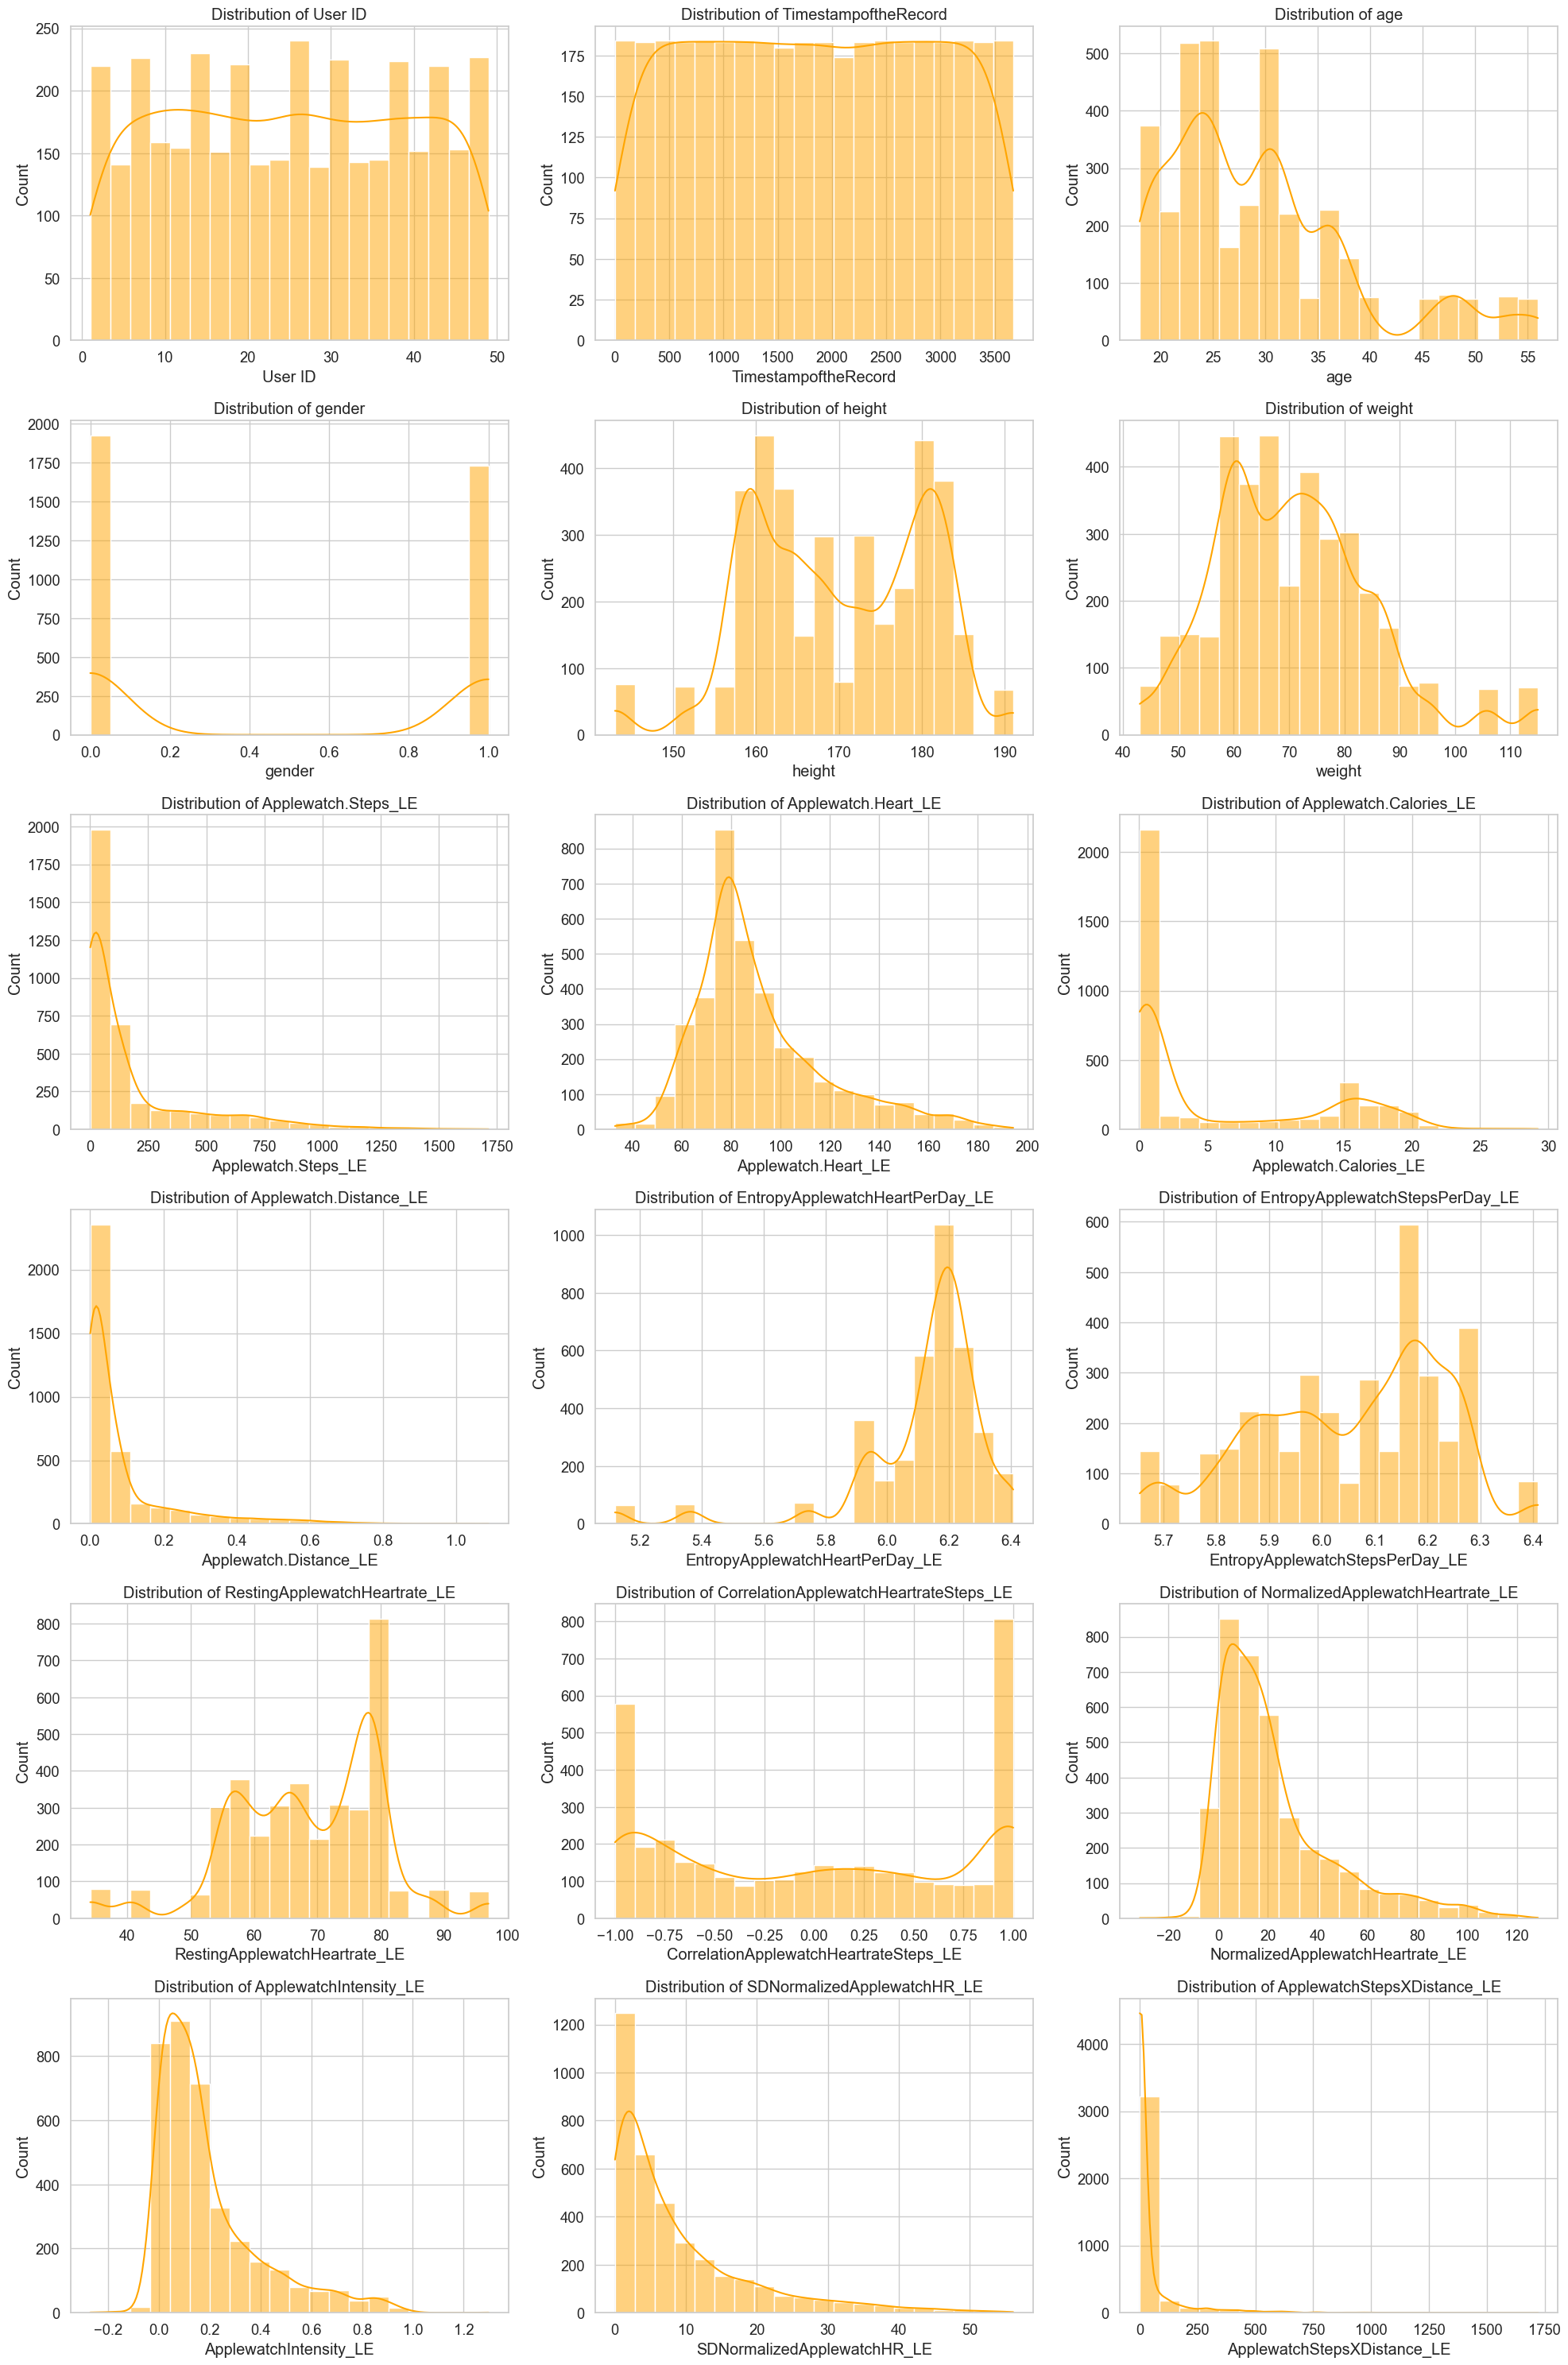

In [15]:
sns.set(style="whitegrid", font_scale=1.2)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
rows = (len(numeric_columns) + 2) // 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=20, kde=True, color='orange', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
user_stats = data.groupby('User ID').agg(
    record_count=('TimestampoftheRecord', 'count'),
    unique_activities=('activity_trimmed', 'nunique')  
).reset_index()
print(user_stats)

    User ID  record_count  unique_activities
0         1            76                  6
1         2            71                  6
2         3            73                  6
3         4            72                  6
4         5            69                  5
5         6            78                  6
6         7            76                  6
7         8            72                  6
8         9            74                  6
9        10            85                  6
10       11            78                  6
11       12            76                  6
12       13            74                  6
13       14            79                  6
14       15            77                  6
15       16            77                  6
16       17            74                  6
17       18            72                  6
18       19            75                  6
19       20            74                  6
20       21            73                  6
21       2

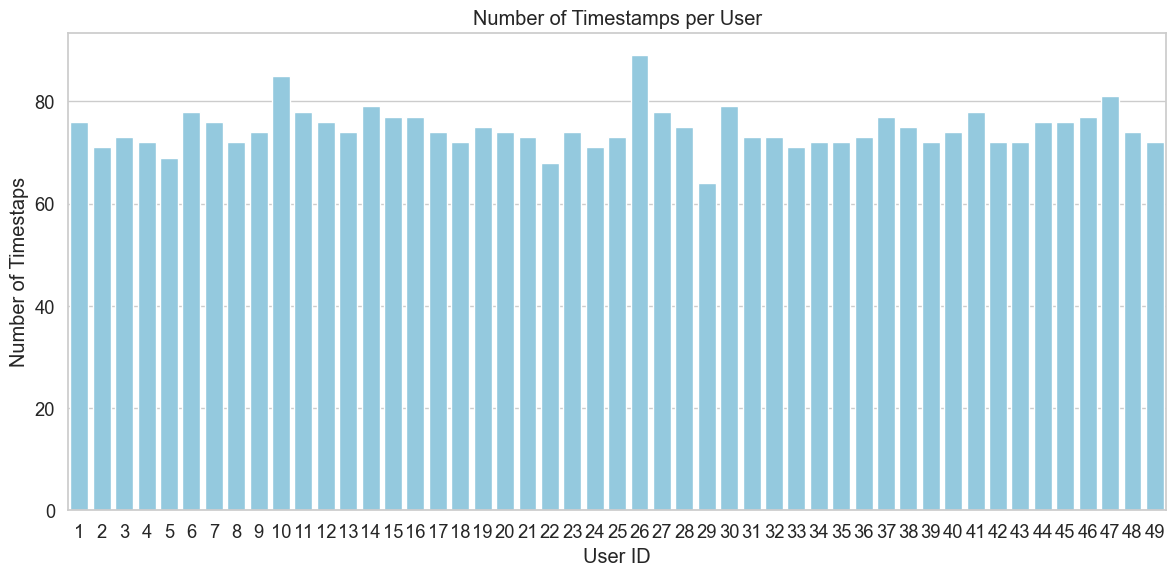

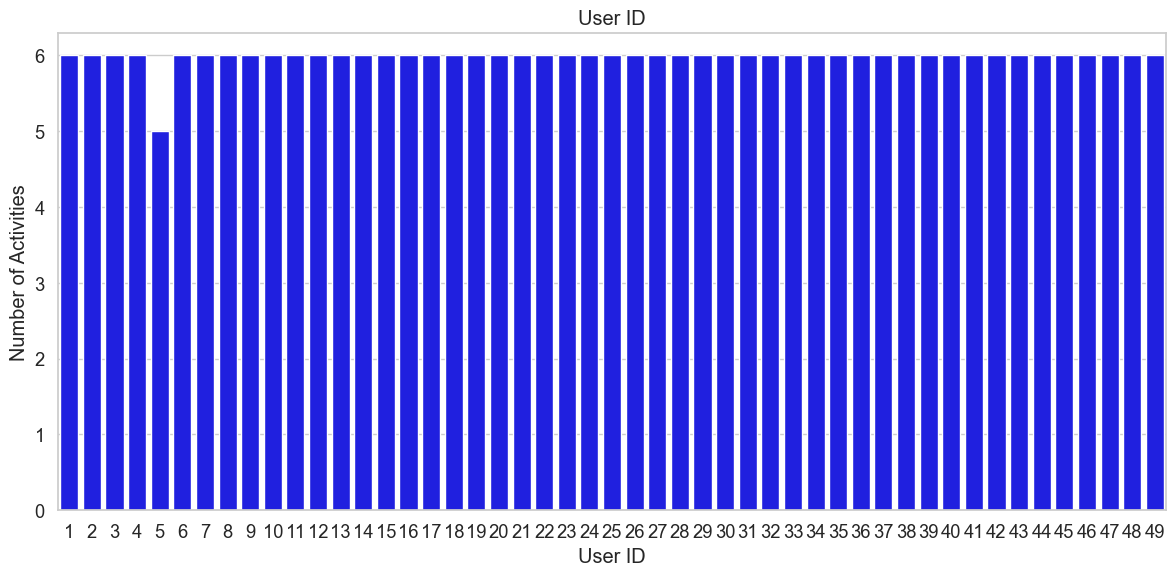

In [17]:
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 6))
sns.barplot(x='User ID', y='record_count', data=user_stats, color='skyblue')
plt.title("Number of Timestamps per User")
plt.xlabel("User ID")
plt.ylabel("Number of Timestaps")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='User ID', y='unique_activities', data=user_stats, color='blue')
plt.title("User ID")
plt.xlabel("User ID")
plt.ylabel("Number of Activities")
plt.tight_layout()
plt.show()


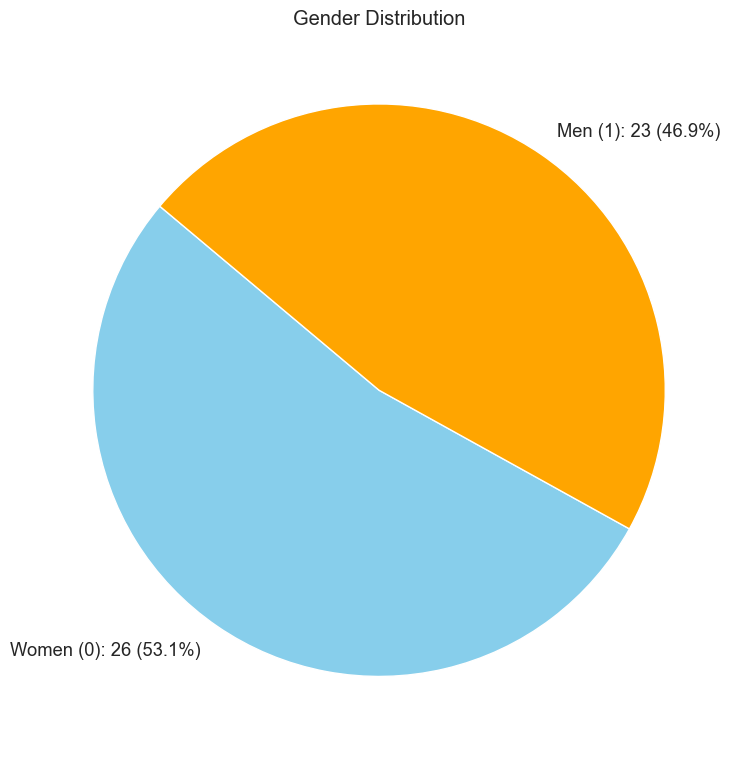

In [18]:
user_gender_mapping = data[['User ID', 'gender']].drop_duplicates()
gender_counts = user_gender_mapping['gender'].value_counts()

labels = [f'Women (0): {gender_counts[0]} ({gender_counts[0] / gender_counts.sum() * 100:.1f}%)',
          f'Men (1): {gender_counts[1]} ({gender_counts[1] / gender_counts.sum() * 100:.1f}%)']
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=labels,
    startangle=140,
    colors=['skyblue', 'orange']
)

plt.title("Gender Distribution")
plt.tight_layout()
plt.show()



Tutaj by sie zgadzala liczba kobiet z opisem danych - 26.

In [19]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_cols)

Numeric Columns: ['User ID', 'TimestampoftheRecord', 'age', 'gender', 'height', 'weight', 'Applewatch.Steps_LE', 'Applewatch.Heart_LE', 'Applewatch.Calories_LE', 'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE', 'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE', 'CorrelationApplewatchHeartrateSteps_LE', 'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE', 'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE']


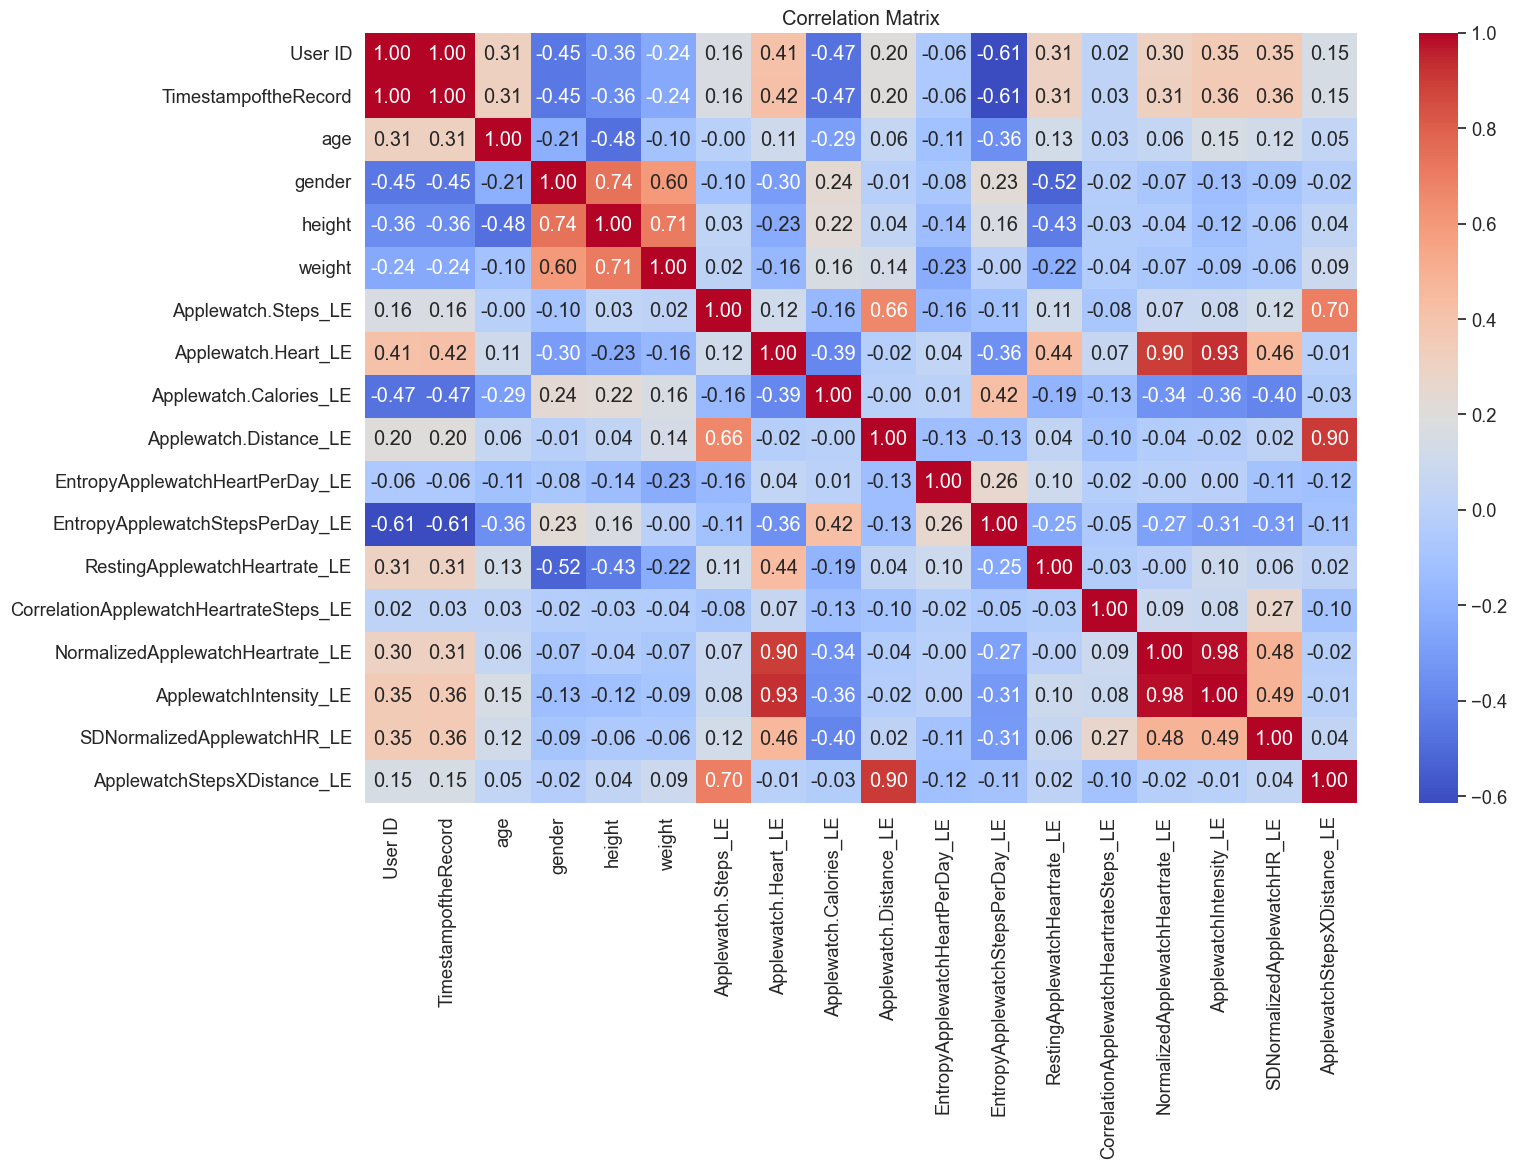

In [20]:
numeric_data = data.select_dtypes(include=['number']) 
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

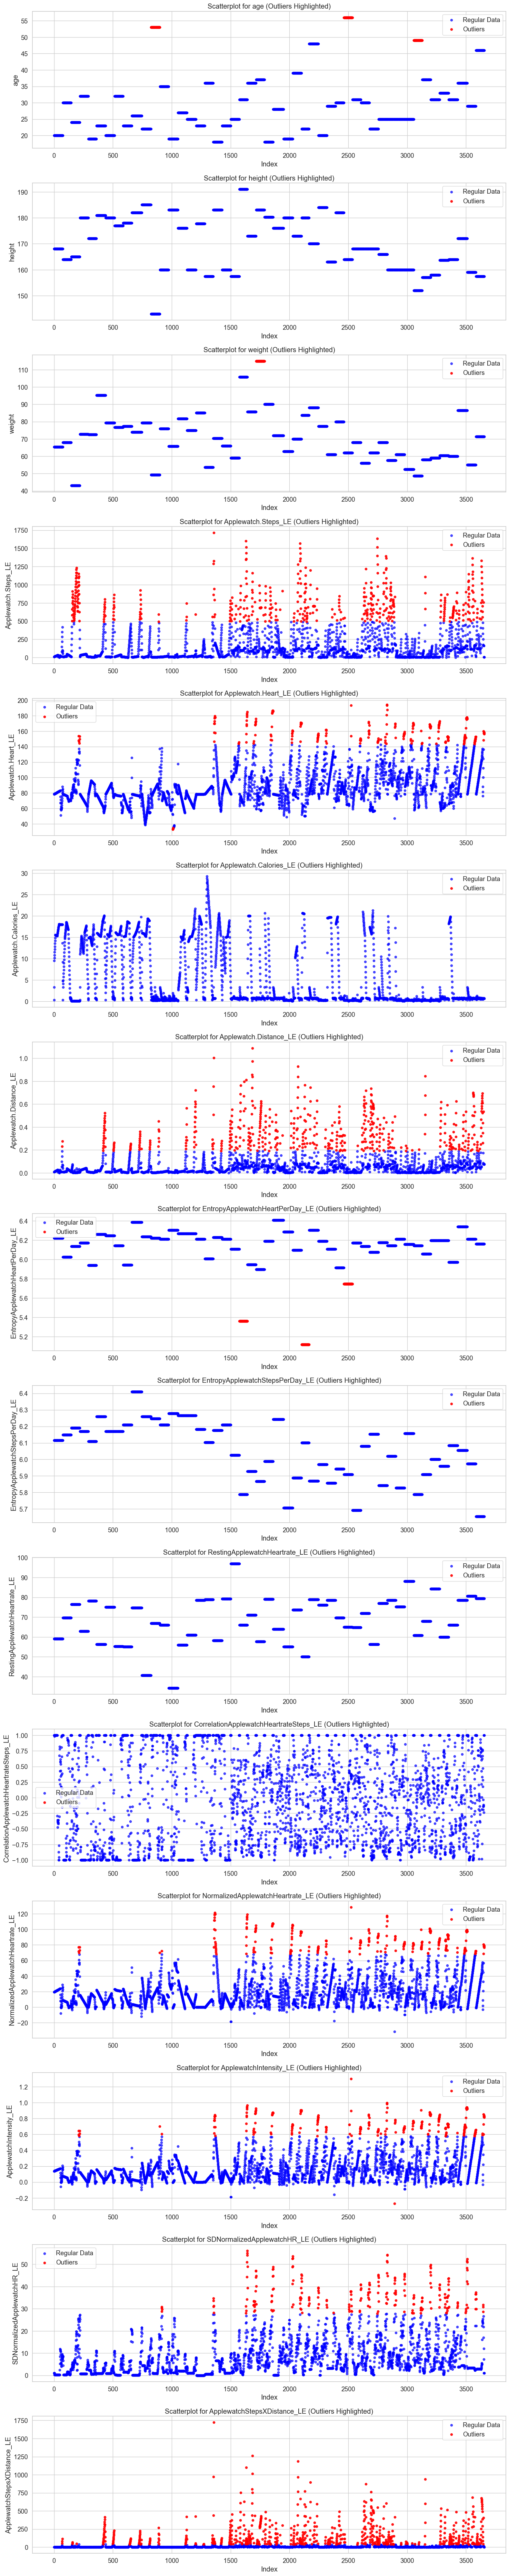

Number or Outliers:
{'age': 220, 'height': 0, 'weight': 71, 'Applewatch.Steps_LE': 487, 'Applewatch.Heart_LE': 241, 'Applewatch.Calories_LE': 0, 'Applewatch.Distance_LE': 499, 'EntropyApplewatchHeartPerDay_LE': 204, 'EntropyApplewatchStepsPerDay_LE': 0, 'RestingApplewatchHeartrate_LE': 0, 'CorrelationApplewatchHeartrateSteps_LE': 0, 'NormalizedApplewatchHeartrate_LE': 261, 'ApplewatchIntensity_LE': 258, 'SDNormalizedApplewatchHR_LE': 247, 'ApplewatchStepsXDistance_LE': 662}


In [21]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
columns_to_plot = [col for col in numerical_columns if col not in ['gender', 'TimestampoftheRecord', 'User ID']]

def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

plt.figure(figsize=(15, len(columns_to_plot) * 5))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    
    outliers = identify_outliers_iqr(data, col)
    non_outliers = data[~data.index.isin(outliers.index)]
    
    plt.scatter(non_outliers.index, non_outliers[col], color='blue', alpha=0.7, label='Regular Data', s=20)

    plt.scatter(outliers.index, outliers[col], color='red', alpha=0.9, label='Outliers', s=20)
    
    plt.title(f'Scatterplot for {col} (Outliers Highlighted)')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

outlier_summary = {col: len(identify_outliers_iqr(data, col)) for col in columns_to_plot}
print("Number or Outliers:")
print(outlier_summary)


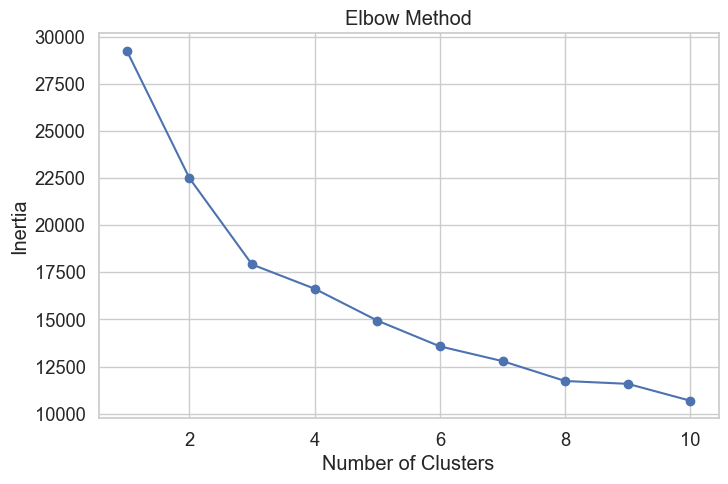

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

features = ['Applewatch.Heart_LE', 'RestingApplewatchHeartrate_LE', 
            'NormalizedApplewatchHeartrate_LE', 'SDNormalizedApplewatchHR_LE', 
            'CorrelationApplewatchHeartrateSteps_LE', 'age', 'gender', 'weight']

data_subset = data[features]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Metoda "łokcia"
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



Wykres pokazuje "metodę łokcia" do określenia optymalnej liczby klastrów w zadaniu grupowania (np. k-means). W tej metodzie celem jest znalezienie punktu, w którym wartość inercji (suma kwadratów odległości) gwałtownie maleje, a następnie zaczyna się wypłaszczać, tworząc kształt przypominający "łokieć".
Z wykresu wynika, że:
Największy spadek inercji występuje pomiędzy 2 a 4 klastrami.
Po 4 klastrach tempo spadku znacząco się zmniejsza.
Zatem 4 klastry wydają się być optymalną liczbą, ponieważ zapewniają równowagę pomiędzy minimalizowaniem inercji a unikaniem nadmiernej złożoności.

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_6384\900336686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = kmeans.fit_predict(data_scaled)
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_6384\900336686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PCA1'] = data_pca[:, 0]
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_6384\900336686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

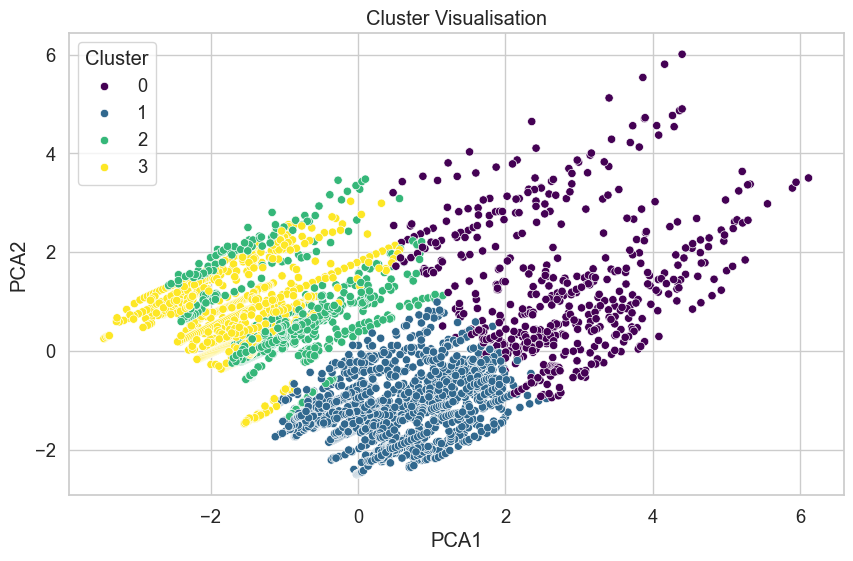

In [23]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4, random_state=42)
data_subset['Cluster'] = kmeans.fit_predict(data_scaled)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

data_subset['PCA1'] = data_pca[:, 0]
data_subset['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_subset, palette='viridis')
plt.title('Cluster Visualisation')
plt.show()


In [24]:
cluster_analysis = data_subset.groupby('Cluster').mean()
print(cluster_analysis)

         Applewatch.Heart_LE  RestingApplewatchHeartrate_LE  \
Cluster                                                       
0                 142.905901                      72.300496   
1                  89.756790                      74.170159   
2                  84.932327                      72.514887   
3                  70.557487                      54.337271   

         NormalizedApplewatchHeartrate_LE  SDNormalizedApplewatchHR_LE  \
Cluster                                                                  
0                               70.605406                    21.498272   
1                               15.586631                     7.904897   
2                               12.417441                     7.462105   
3                               16.220216                     4.566814   

         CorrelationApplewatchHeartrateSteps_LE        age    gender  \
Cluster                                                                
0                               

Cluster 0: 

Grupa o wysokim ryzyku sercowym
Applewatch.Heart_LE: Średnia wartość wynosi 142.91, co jest znacznie wyższe niż w innych klastrach. To wskazuje na osoby z wysokim tętnem.
RestingApplewatchHeartrate_LE: Średnie spoczynkowe tętno wynosi 72.30, co jest umiarkowanie wysokie.
NormalizedApplewatchHeartrate_LE i SDNormalizedApplewatchHR_LE: Wysokie wartości wskazują na dużą zmienność rytmu serca, co może być oznaką problemów zdrowotnych.
CorrelationApplewatchHeartrateSteps_LE: Współczynnik korelacji wynosi 0.169, co sugeruje umiarkowany związek między aktywnością fizyczną a rytmem serca.
Demografia:
Wiek: Średni wiek wynosi 30.7 lat.
Płeć: Większość stanowią mężczyźni (29.5% to kobiety).
Waga: Średnia waga wynosi 67.6 kg, co jest w dolnym zakresie w porównaniu z innymi klastrami.


Cluster 1: 

Grupa umiarkowanego ryzyka
Applewatch.Heart_LE: Średnia wartość wynosi 89.76, co jest umiarkowaną wartością.
RestingApplewatchHeartrate_LE: Średnie spoczynkowe tętno wynosi 74.17, co również mieści się w normie.
NormalizedApplewatchHeartrate_LE i SDNormalizedApplewatchHR_LE: Wartości są niższe niż w klastrze 0, wskazując na bardziej stabilny rytm serca.
CorrelationApplewatchHeartrateSteps_LE: Wartość -0.025 wskazuje na brak związku między aktywnością fizyczną a rytmem serca.
Demografia:
Wiek: Średni wiek wynosi 32.7 lat, czyli jest to najstarsza grupa.
Płeć: Grupa jest w większości męska (tylko 3.6% to kobiety).
Waga: Średnia waga wynosi 61.4 kg, najniższa spośród klastrów.


Cluster 2: 

Młodsza grupa o wyższym ryzyku
Applewatch.Heart_LE: Średnia wartość wynosi 84.93, co jest nieco niższe niż w klastrze 1, ale wciąż w umiarkowanym zakresie.
RestingApplewatchHeartrate_LE: Średnie spoczynkowe tętno wynosi 72.51, co jest bliskie normy.
NormalizedApplewatchHeartrate_LE i SDNormalizedApplewatchHR_LE: Wartości są podobne do tych w klastrze 1.
CorrelationApplewatchHeartrateSteps_LE: Wartość -0.021 wskazuje na bardzo mały związek między aktywnością fizyczną a rytmem serca.
Demografia:
Wiek: Średni wiek wynosi 28.8 lat.
Płeć: 88.9% to kobiety.
Waga: Średnia waga wynosi 87.3 kg, co jest najwyższą wartością spośród klastrów.


Cluster 3: 

Grupa o niskim ryzyku
Applewatch.Heart_LE: Średnia wartość wynosi 70.56, co jest najniższą wartością, wskazującą na zdrowe tętno.
RestingApplewatchHeartrate_LE: Średnie spoczynkowe tętno wynosi 54.33, co jest w dolnym zakresie normy.
NormalizedApplewatchHeartrate_LE i SDNormalizedApplewatchHR_LE: Niskie wartości wskazują na bardzo stabilny rytm serca.
CorrelationApplewatchHeartrateSteps_LE: Wartość -0.011 wskazuje na minimalny związek między aktywnością a rytmem serca.
Demografia:
Wiek: Średni wiek wynosi 23.97 lat, czyli najmłodsza grupa.
Płeć: 96.2% to kobiety.
Waga: Średnia waga wynosi 74.9 kg, co jest zbliżone do normy.

Podsumowanie


Cluster 0: Wysokie ryzyko sercowe, umiarkowany wiek, wyższy udział mężczyzn.

Cluster 1: Umiarkowane ryzyko, najstarsza grupa, stabilny rytm serca.

Cluster 2: Młodsza grupa, większość kobiety, umiarkowane ryzyko.

Cluster 3: Najniższe ryzyko, młoda i w większości żeńska grupa, stabilny rytm serca.